In [1]:
import sys
sys.path.append("../")
sys.path.append("../../")

import os
import random
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from predict import predict
from open_data import open_data, create_global_batch,get_df_stats,apply_norm
from dataset import RadarDataset,RadarCollate
from encoder_decoder_clean import lstm_seq2seq
from simple_model import LSTM
from train import train
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from torch.utils.data import DataLoader

In [29]:
PATH_CSV="/Users/iris/Documents/radar_deep/Radar_Traffic_Counts.csv" #"/Users/clemencevast/Documents/Courses/MachineLearning/RadarTrafficData_files/Radar_Traffic_Counts.csv" #"/Users/iris/Documents/radar_deep/Radar_Traffic_Counts.csv"
radar_name=' CAPITAL OF TEXAS HWY / LAKEWOOD DR'
DAYS_INPUT=7
WINDOW_LABEL=1
INPUT_SIZE=(DAYS_INPUT)*24*4
OUTPUT_SIZE=(WINDOW_LABEL)*24*4
TOTAL_DAYS=100
batch_size = 1

In [30]:
df1=open_data(PATH_CSV, direction="NB", radar=radar_name, year=2018)

In [31]:
batch_df=create_global_batch(df1, window_x_day=DAYS_INPUT, window_label_day=WINDOW_LABEL, gap_acquisition=1, tot_len_day=TOTAL_DAYS)
df_mean,df_std=get_df_stats(batch_df)
new_data=apply_norm(batch_df,df_mean,df_std)


Building batch 0 
 x begin 2018-01-02 label begin 2018-01-09 end period 2018-04-04 
Building batch 1 
 x begin 2018-01-03 label begin 2018-01-10 end period 2018-04-04 
Building batch 2 
 x begin 2018-01-04 label begin 2018-01-11 end period 2018-04-04 
Building batch 3 
 x begin 2018-01-05 label begin 2018-01-12 end period 2018-04-04 
We do not have all the dates for the time period in label , 96 42
Building batch 3 
 x begin 2018-01-06 label begin 2018-01-13 end period 2018-04-04 
Building batch 3 
 x begin 2018-01-07 label begin 2018-01-14 end period 2018-04-04 
Building batch 3 
 x begin 2018-01-08 label begin 2018-01-15 end period 2018-04-04 
Building batch 3 
 x begin 2018-01-09 label begin 2018-01-16 end period 2018-04-04 
Building batch 3 
 x begin 2018-01-10 label begin 2018-01-17 end period 2018-04-04 
Building batch 3 
 x begin 2018-01-11 label begin 2018-01-18 end period 2018-04-04 
Building batch 3 
 x begin 2018-01-12 label begin 2018-01-19 end period 2018-04-04 
Building b

Building batch 38 
 x begin 2018-03-19 label begin 2018-03-26 end period 2018-04-04 
Building batch 39 
 x begin 2018-03-20 label begin 2018-03-27 end period 2018-04-04 
Building batch 40 
 x begin 2018-03-21 label begin 2018-03-28 end period 2018-04-04 
We do not have all the dates for the time period in label , 96 54
Building batch 40 
 x begin 2018-03-22 label begin 2018-03-29 end period 2018-04-04 
We do not have all the dates for the time period in x , 672 630
Building batch 40 
 x begin 2018-03-23 label begin 2018-03-30 end period 2018-04-04 
We do not have all the dates for the time period in x , 672 630
Building batch 40 
 x begin 2018-03-24 label begin 2018-03-31 end period 2018-04-04 
Building batch 40 
 x begin 2018-03-25 label begin 2018-04-01 end period 2018-04-04 
Building batch 40 
 x begin 2018-03-26 label begin 2018-04-02 end period 2018-04-04 
Building batch 40 
 x begin 2018-03-27 label begin 2018-04-03 end period 2018-04-04 
Building batch 40 
 x begin 2018-03-28 la

In [33]:
fullset = RadarDataset(dataframe=batch_df,transform=None)
ptrain,pval,ptest=0.7,0.15,0.15
trainglobdataset, testdataset = train_test_split(fullset, test_size=ptest,shuffle=False)
traindataset, valdataset = train_test_split(trainglobdataset, test_size=pval/(1-ptest),shuffle=False)
collate_fn = RadarCollate()
trainloader = DataLoader(traindataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
valloader = DataLoader(valdataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)
testloader = DataLoader(testdataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)

(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)


In [55]:
len(testloader)

7

# Training LSTM encoder decoder

In [60]:
input_dim = 1   
hidden_dim = 64
layer_dim = 2
output_dim = OUTPUT_SIZE
seq_dim = 1
epochs=300
batch_size=1

In [61]:
model_seq2seq=lstm_seq2seq(1, hidden_dim)

In [62]:
iteration2,losses2,loss_val_list2=model_seq2seq.train_model(trainloader,valloader,epochs, output_dim, batch_size=batch_size,
                    training_prediction='teacher_forcing', teacher_forcing_ratio=1, learning_rate=0.005, dynamic_tf=False,name_model="new_encode_decod_lre-3",save=True,ite_print=2)

  0%|          | 1/300 [00:07<36:25,  7.31s/it, loss=0.622]/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type lstm_seq2seq. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type lstm_encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve

epoch 1 loss train 0.007969300183633874 loss val 0.10046949237585068


  1%|▏         | 4/300 [00:29<36:32,  7.41s/it, loss=0.007]

epoch 3 loss train 0.006796750772212233 loss val 0.1268736869096756


  2%|▏         | 6/300 [00:44<36:40,  7.49s/it, loss=0.007]

epoch 5 loss train 0.006625513117926728 loss val 0.10925864428281784


  3%|▎         | 8/300 [00:59<36:31,  7.50s/it, loss=0.007]

epoch 7 loss train 0.006541914381419441 loss val 0.09492319822311401


  3%|▎         | 10/300 [01:14<36:12,  7.49s/it, loss=0.006]

epoch 9 loss train 0.0064331142556121835 loss val 0.13575397431850433


  4%|▍         | 12/300 [01:30<38:35,  8.04s/it, loss=0.006]

epoch 11 loss train 0.006419690683417555 loss val 0.10471329838037491


  5%|▍         | 14/300 [01:46<38:05,  7.99s/it, loss=0.006]

epoch 13 loss train 0.006364065124736433 loss val 0.13004471361637115


  5%|▌         | 16/300 [02:03<38:16,  8.09s/it, loss=0.006]

epoch 15 loss train 0.006342478304369641 loss val 0.11451394110918045


  6%|▌         | 18/300 [02:18<37:46,  8.04s/it, loss=0.006]

epoch 17 loss train 0.006326904561969319 loss val 0.10046268254518509


  7%|▋         | 20/300 [02:34<37:20,  8.00s/it, loss=0.006]

epoch 19 loss train 0.006318256639393179 loss val 0.2471778243780136


  7%|▋         | 22/300 [02:50<37:15,  8.04s/it, loss=0.006]

epoch 21 loss train 0.006308939825560499 loss val 0.0830998346209526


  8%|▊         | 24/300 [03:06<36:10,  7.86s/it, loss=0.007]

epoch 23 loss train 0.00658746347471606 loss val 0.20205926895141602


  9%|▊         | 26/300 [03:21<36:02,  7.89s/it, loss=0.006]

epoch 25 loss train 0.00633302862531439 loss val 0.10839955508708954


  9%|▉         | 28/300 [03:37<35:56,  7.93s/it, loss=0.006]

epoch 27 loss train 0.006226322426560468 loss val 0.12998488545417786


 10%|█         | 30/300 [03:52<34:36,  7.69s/it, loss=0.006]

epoch 29 loss train 0.006237392211914994 loss val 0.19215404987335205


 11%|█         | 32/300 [04:07<33:30,  7.50s/it, loss=0.006]

epoch 31 loss train 0.006156862962857953 loss val 2.210683822631836


 11%|█▏        | 34/300 [04:21<33:08,  7.47s/it, loss=0.006]

epoch 33 loss train 0.006085513562928619 loss val 0.18152034282684326


 12%|█▏        | 36/300 [04:36<32:24,  7.37s/it, loss=0.006]

epoch 35 loss train 0.006050786776800773 loss val 0.1379137635231018


 13%|█▎        | 38/300 [04:51<32:21,  7.41s/it, loss=0.006]

epoch 37 loss train 0.005833289012246366 loss val 0.18553908169269562


 13%|█▎        | 40/300 [05:05<32:08,  7.42s/it, loss=0.006]

epoch 39 loss train 0.0059887060695993045 loss val 0.1392177790403366


 14%|█▍        | 42/300 [05:20<31:52,  7.41s/it, loss=0.006]

epoch 41 loss train 0.005594744355351265 loss val 0.09356939792633057


 15%|█▍        | 44/300 [05:34<31:10,  7.31s/it, loss=0.005]

epoch 43 loss train 0.0052800684809751275 loss val 0.10588452219963074


 15%|█▌        | 46/300 [05:49<30:35,  7.23s/it, loss=0.005]

epoch 45 loss train 0.005403889243357948 loss val 0.1738835573196411


 16%|█▌        | 48/300 [06:03<30:10,  7.18s/it, loss=0.005]

epoch 47 loss train 0.005182300777440625 loss val 0.08397961407899857


 17%|█▋        | 50/300 [06:17<29:57,  7.19s/it, loss=0.005]

epoch 49 loss train 0.005178123714618518 loss val 0.051945071667432785


 17%|█▋        | 52/300 [06:32<30:16,  7.32s/it, loss=0.005]

epoch 51 loss train 0.005156235740287229 loss val 0.05831616744399071


 18%|█▊        | 54/300 [06:46<30:09,  7.36s/it, loss=0.005]

epoch 53 loss train 0.004846343770623207 loss val 0.11125343292951584


 19%|█▊        | 56/300 [07:01<29:51,  7.34s/it, loss=0.005]

epoch 55 loss train 0.004755860277717667 loss val 0.12912718951702118


 19%|█▉        | 58/300 [07:16<30:31,  7.57s/it, loss=0.005]

epoch 57 loss train 0.004772165817225219 loss val 0.07188543677330017


 20%|██        | 60/300 [07:34<32:42,  8.18s/it, loss=0.005]

epoch 59 loss train 0.004771832977504735 loss val 0.06901001930236816


 21%|██        | 62/300 [07:48<30:56,  7.80s/it, loss=0.004]

epoch 61 loss train 0.004387453360582835 loss val 0.07024703174829483


 21%|██▏       | 64/300 [08:03<29:53,  7.60s/it, loss=0.004]

epoch 63 loss train 0.004386882357981189 loss val 0.07440920174121857


 22%|██▏       | 66/300 [08:18<29:20,  7.52s/it, loss=0.004]

epoch 65 loss train 0.004420680214285052 loss val 0.10863780975341797


 23%|██▎       | 68/300 [08:33<29:00,  7.50s/it, loss=0.004]

epoch 67 loss train 0.004348814736918679 loss val 0.11951551586389542


 23%|██▎       | 70/300 [08:48<29:01,  7.57s/it, loss=0.005]

epoch 69 loss train 0.004523406545298972 loss val 0.05668291822075844


 24%|██▍       | 72/300 [09:03<28:36,  7.53s/it, loss=0.004]

epoch 71 loss train 0.004206201974219377 loss val 0.11037199199199677


 25%|██▍       | 74/300 [09:18<28:38,  7.60s/it, loss=0.004]

epoch 73 loss train 0.004070002109593978 loss val 0.06034759804606438


 25%|██▌       | 76/300 [09:33<28:09,  7.54s/it, loss=0.004]

epoch 75 loss train 0.004063723226343947 loss val 0.056519124656915665


 26%|██▌       | 78/300 [09:48<27:51,  7.53s/it, loss=0.004]

epoch 77 loss train 0.004210066154233313 loss val 0.10694652050733566


 27%|██▋       | 80/300 [10:03<27:34,  7.52s/it, loss=0.004]

epoch 79 loss train 0.003949832790697526 loss val 0.05805157870054245


 27%|██▋       | 82/300 [10:18<27:08,  7.47s/it, loss=0.004]

epoch 81 loss train 0.004182260980347304 loss val 0.3987869918346405


 28%|██▊       | 84/300 [10:32<26:56,  7.48s/it, loss=0.004]

epoch 83 loss train 0.004122195611541558 loss val 0.1138584315776825


 29%|██▊       | 86/300 [10:47<26:45,  7.50s/it, loss=0.004]

epoch 85 loss train 0.003913056970174823 loss val 0.5219125747680664


 29%|██▉       | 88/300 [11:02<26:32,  7.51s/it, loss=0.004]

epoch 87 loss train 0.003875527609904696 loss val 0.4661789536476135


 30%|███       | 90/300 [11:17<26:10,  7.48s/it, loss=0.004]

epoch 89 loss train 0.003944932876038365 loss val 0.045297570526599884


 31%|███       | 92/300 [11:34<27:51,  8.04s/it, loss=0.004]

epoch 91 loss train 0.003719293963513337 loss val 0.05037900432944298


 31%|███▏      | 94/300 [11:50<27:30,  8.01s/it, loss=0.004]

epoch 93 loss train 0.003865452988455737 loss val 0.07674948871135712


 32%|███▏      | 96/300 [12:05<26:42,  7.86s/it, loss=0.004]

epoch 95 loss train 0.003732865474635868 loss val 0.48847654461860657


 33%|███▎      | 98/300 [12:20<25:44,  7.65s/it, loss=0.004]

epoch 97 loss train 0.0036802772644607884 loss val 0.05915135517716408


 33%|███▎      | 100/300 [12:35<25:23,  7.62s/it, loss=0.004]

epoch 99 loss train 0.003831610626158571 loss val 0.37065577507019043


 34%|███▍      | 102/300 [12:50<25:01,  7.58s/it, loss=0.004]

epoch 101 loss train 0.003710501708805428 loss val 0.08133499324321747


 35%|███▍      | 104/300 [13:05<24:33,  7.52s/it, loss=0.004]

epoch 103 loss train 0.0035553368756414522 loss val 0.437836229801178


 35%|███▌      | 106/300 [13:20<24:10,  7.48s/it, loss=0.004]

epoch 105 loss train 0.0036003287594732164 loss val 0.06651872396469116


 36%|███▌      | 108/300 [13:35<23:53,  7.46s/it, loss=0.004]

epoch 107 loss train 0.004141073676042392 loss val 0.03848916292190552


 37%|███▋      | 110/300 [13:49<23:36,  7.46s/it, loss=0.004]

epoch 109 loss train 0.0037306592629257856 loss val 0.6163589358329773


 37%|███▋      | 112/300 [14:04<23:06,  7.37s/it, loss=0.004]

epoch 111 loss train 0.0036379901076933102 loss val 0.08750346302986145


 38%|███▊      | 114/300 [14:18<22:39,  7.31s/it, loss=0.003]

epoch 113 loss train 0.003478134626805383 loss val 0.08460758626461029


 39%|███▊      | 116/300 [14:33<22:25,  7.31s/it, loss=0.003]

epoch 115 loss train 0.0034940151568402405 loss val 0.07465654611587524


 39%|███▉      | 118/300 [14:47<22:08,  7.30s/it, loss=0.004]

epoch 117 loss train 0.003741744835029489 loss val 0.13360443711280823


 40%|████      | 120/300 [15:02<21:53,  7.30s/it, loss=0.003]

epoch 119 loss train 0.0033649077564145307 loss val 0.09112852066755295


 41%|████      | 122/300 [15:16<21:53,  7.38s/it, loss=0.003]

epoch 121 loss train 0.003320732671584535 loss val 0.08544515073299408


 41%|████▏     | 124/300 [15:31<21:50,  7.45s/it, loss=0.003]

epoch 123 loss train 0.003344872866624168 loss val 0.08874999731779099


 42%|████▏     | 126/300 [15:46<21:34,  7.44s/it, loss=0.003]

epoch 125 loss train 0.0032556541679826167 loss val 0.07126318663358688


 43%|████▎     | 128/300 [16:01<21:18,  7.43s/it, loss=0.003]

epoch 127 loss train 0.003417034442203918 loss val 0.06990255415439606


 43%|████▎     | 130/300 [16:16<21:03,  7.44s/it, loss=0.003]

epoch 129 loss train 0.0032174925997553927 loss val 0.05996889993548393


 44%|████▍     | 132/300 [16:30<20:49,  7.44s/it, loss=0.003]

epoch 131 loss train 0.003489673293578172 loss val 0.05617927014827728


 45%|████▍     | 134/300 [16:45<20:28,  7.40s/it, loss=0.003]

epoch 133 loss train 0.003306359751150012 loss val 0.4288862645626068


 45%|████▌     | 136/300 [17:00<20:19,  7.43s/it, loss=0.003]

epoch 135 loss train 0.0032682079784405816 loss val 0.10728958249092102


 46%|████▌     | 138/300 [17:14<19:55,  7.38s/it, loss=0.003]

epoch 137 loss train 0.0030485848089613554 loss val 0.05105084180831909


 47%|████▋     | 140/300 [17:29<19:43,  7.39s/it, loss=0.003]

epoch 139 loss train 0.003122081880324653 loss val 0.08262907713651657


 47%|████▋     | 142/300 [17:44<19:27,  7.39s/it, loss=0.003]

epoch 141 loss train 0.0032404747533811523 loss val 0.050310298800468445


 48%|████▊     | 144/300 [17:58<19:10,  7.37s/it, loss=0.003]

epoch 143 loss train 0.0031521456486578764 loss val 0.08138152956962585


 49%|████▊     | 146/300 [18:13<18:49,  7.34s/it, loss=0.003]

epoch 145 loss train 0.0032721082243369892 loss val 0.05688507482409477


 49%|████▉     | 148/300 [18:27<18:35,  7.34s/it, loss=0.003]

epoch 147 loss train 0.0030378252350991325 loss val 0.06757835298776627


 50%|█████     | 150/300 [18:42<18:31,  7.41s/it, loss=0.003]

epoch 149 loss train 0.0030150295538727994 loss val 0.1448865383863449


 51%|█████     | 152/300 [18:57<18:20,  7.44s/it, loss=0.003]

epoch 151 loss train 0.0031513648469366933 loss val 0.09181426465511322


 51%|█████▏    | 154/300 [19:12<18:03,  7.42s/it, loss=0.003]

epoch 153 loss train 0.0030905296069769455 loss val 0.0901484340429306


 52%|█████▏    | 156/300 [19:26<17:40,  7.37s/it, loss=0.003]

epoch 155 loss train 0.0029066253690481453 loss val 0.07212796807289124


 53%|█████▎    | 158/300 [19:41<17:33,  7.42s/it, loss=0.003]

epoch 157 loss train 0.002781892688030244 loss val 0.10623201727867126


 53%|█████▎    | 160/300 [19:56<17:13,  7.38s/it, loss=0.003]

epoch 159 loss train 0.0030005395923840945 loss val 0.09723597764968872


 54%|█████▍    | 162/300 [20:10<16:58,  7.38s/it, loss=0.003]

epoch 161 loss train 0.0026511776148773997 loss val 0.10294875502586365


 55%|█████▍    | 164/300 [20:25<16:34,  7.31s/it, loss=0.003]

epoch 163 loss train 0.002672320551937446 loss val 0.09729799628257751


 55%|█████▌    | 166/300 [20:40<16:56,  7.59s/it, loss=0.003]

epoch 165 loss train 0.002833474994986318 loss val 0.04034196585416794


 56%|█████▌    | 168/300 [20:55<16:34,  7.53s/it, loss=0.003]

epoch 167 loss train 0.0026374669957606655 loss val 0.09043274074792862


 57%|█████▋    | 170/300 [21:12<17:28,  8.06s/it, loss=0.003]

epoch 169 loss train 0.0027375634131853338 loss val 0.08290599286556244


 57%|█████▋    | 172/300 [21:28<16:57,  7.95s/it, loss=0.003]

epoch 171 loss train 0.0026655340188881382 loss val 0.042626455426216125


 58%|█████▊    | 174/300 [21:42<16:13,  7.73s/it, loss=0.003]

epoch 173 loss train 0.002708264489358823 loss val 0.11139555275440216


 59%|█████▊    | 176/300 [21:58<15:55,  7.71s/it, loss=0.003]

epoch 175 loss train 0.002567568376045009 loss val 0.05901229754090309


 59%|█████▉    | 178/300 [22:12<15:25,  7.58s/it, loss=0.002]

epoch 177 loss train 0.0024481281663091587 loss val 0.37973371148109436


 60%|██████    | 180/300 [22:31<16:34,  8.29s/it, loss=0.003]

epoch 179 loss train 0.0025715404564315186 loss val 0.12150624394416809


 61%|██████    | 182/300 [22:46<15:44,  8.00s/it, loss=0.003]

epoch 181 loss train 0.00265389600826893 loss val 0.7044306993484497


 61%|██████▏   | 184/300 [23:01<15:10,  7.85s/it, loss=0.003]

epoch 183 loss train 0.00250385730760172 loss val 0.07001874595880508


 62%|██████▏   | 186/300 [23:17<14:45,  7.76s/it, loss=0.002]

epoch 185 loss train 0.0022464945380176815 loss val 0.06538733094930649


 63%|██████▎   | 188/300 [23:31<14:09,  7.59s/it, loss=0.002]

epoch 187 loss train 0.002316695045530131 loss val 0.09276808798313141


 63%|██████▎   | 190/300 [23:46<13:50,  7.55s/it, loss=0.002]

epoch 189 loss train 0.0023323644480634747 loss val 0.08153974264860153


 64%|██████▍   | 192/300 [24:03<14:11,  7.88s/it, loss=0.002]

epoch 191 loss train 0.0022670258913422003 loss val 0.09118407219648361


 65%|██████▍   | 194/300 [24:18<13:44,  7.78s/it, loss=0.002]

epoch 193 loss train 0.0023112364121646222 loss val 0.09704656153917313


 65%|██████▌   | 196/300 [24:32<13:00,  7.51s/it, loss=0.002]

epoch 195 loss train 0.0023467962434681666 loss val 0.07995511591434479


 66%|██████▌   | 198/300 [24:47<12:39,  7.45s/it, loss=0.003]

epoch 197 loss train 0.002669663039601541 loss val 0.042635850608348846


 67%|██████▋   | 200/300 [25:02<12:34,  7.54s/it, loss=0.002]

epoch 199 loss train 0.002477833061545555 loss val 0.11905796080827713


 67%|██████▋   | 202/300 [25:17<12:17,  7.53s/it, loss=0.002]

epoch 201 loss train 0.0021939339889546056 loss val 0.08812670409679413


 68%|██████▊   | 204/300 [25:32<11:55,  7.45s/it, loss=0.002]

epoch 203 loss train 0.0020634135144064203 loss val 0.07867082953453064


 69%|██████▊   | 206/300 [25:47<12:01,  7.68s/it, loss=0.002]

epoch 205 loss train 0.002386815631845301 loss val 0.08914814889431


 69%|██████▉   | 208/300 [26:02<11:45,  7.66s/it, loss=0.002]

epoch 207 loss train 0.002097590737061442 loss val 0.06996365636587143


 70%|███████   | 210/300 [26:17<11:21,  7.58s/it, loss=0.002]

epoch 209 loss train 0.001979540954510282 loss val 0.3456162214279175


 71%|███████   | 212/300 [26:32<11:03,  7.54s/it, loss=0.002]

epoch 211 loss train 0.0019556202907032067 loss val 0.12903115153312683


 71%|███████▏  | 214/300 [26:47<10:40,  7.44s/it, loss=0.002]

epoch 213 loss train 0.002303276855465291 loss val 0.12951874732971191


 72%|███████▏  | 216/300 [27:02<10:32,  7.53s/it, loss=0.002]

epoch 215 loss train 0.0021470826135815252 loss val 0.11808697134256363


 73%|███████▎  | 218/300 [27:17<10:21,  7.58s/it, loss=0.002]

epoch 217 loss train 0.0018993282595017394 loss val 0.10630664229393005


 73%|███████▎  | 220/300 [27:32<09:58,  7.48s/it, loss=0.002]

epoch 219 loss train 0.002094640739544827 loss val 0.3657483458518982


 74%|███████▍  | 222/300 [27:47<09:46,  7.51s/it, loss=0.002]

epoch 221 loss train 0.001991753327144709 loss val 0.10610601305961609


 75%|███████▍  | 224/300 [28:02<09:45,  7.70s/it, loss=0.002]

epoch 223 loss train 0.0018346640198225422 loss val 0.15667138993740082


 75%|███████▌  | 226/300 [28:18<09:27,  7.67s/it, loss=0.002]

epoch 225 loss train 0.0017720044810890353 loss val 0.09437151998281479


 76%|███████▌  | 228/300 [28:33<09:10,  7.65s/it, loss=0.002]

epoch 227 loss train 0.0018882696292296583 loss val 0.08005375415086746


 77%|███████▋  | 230/300 [28:47<08:48,  7.54s/it, loss=0.002]

epoch 229 loss train 0.0020018898857025696 loss val 0.09883444756269455


 77%|███████▋  | 232/300 [29:02<08:30,  7.51s/it, loss=0.002]

epoch 231 loss train 0.0020476979947748725 loss val 0.10482845455408096


 78%|███████▊  | 234/300 [29:17<08:21,  7.60s/it, loss=0.002]

epoch 233 loss train 0.00173307561531796 loss val 0.08495016396045685


 79%|███████▊  | 236/300 [29:33<08:11,  7.67s/it, loss=0.002]

epoch 235 loss train 0.0018529306357127748 loss val 0.07308997213840485


 79%|███████▉  | 238/300 [29:48<07:54,  7.66s/it, loss=0.002]

epoch 237 loss train 0.0018319003450285112 loss val 0.9777159690856934


 80%|████████  | 240/300 [30:03<07:32,  7.54s/it, loss=0.002]

epoch 239 loss train 0.0018571724878191681 loss val 0.10395577549934387


 81%|████████  | 242/300 [30:18<07:16,  7.52s/it, loss=0.002]

epoch 241 loss train 0.0016748240336060657 loss val 0.0856081023812294


 81%|████████▏ | 244/300 [30:32<06:58,  7.47s/it, loss=0.002]

epoch 243 loss train 0.0016808330484699191 loss val 0.037160176783800125


 82%|████████▏ | 246/300 [30:49<07:10,  7.98s/it, loss=0.002]

epoch 245 loss train 0.001678308640423763 loss val 0.07676340639591217


 83%|████████▎ | 248/300 [31:06<07:05,  8.19s/it, loss=0.002]

epoch 247 loss train 0.0016601425179812526 loss val 0.0586499385535717


 83%|████████▎ | 250/300 [31:21<06:29,  7.80s/it, loss=0.002]

epoch 249 loss train 0.0015676996159267478 loss val 0.1009637787938118


 84%|████████▍ | 252/300 [31:36<06:15,  7.83s/it, loss=0.002]

epoch 251 loss train 0.0015245691569621808 loss val 0.0844985768198967


 85%|████████▍ | 254/300 [31:52<06:00,  7.85s/it, loss=0.003]

epoch 253 loss train 0.0027093065052343135 loss val 0.04650657996535301


 85%|████████▌ | 256/300 [32:12<06:42,  9.16s/it, loss=0.002]

epoch 255 loss train 0.0021160323927428442 loss val 0.07713788747787476


 86%|████████▌ | 258/300 [32:34<06:56,  9.91s/it, loss=0.002]

epoch 257 loss train 0.0019474966476471828 loss val 0.07584542036056519


 87%|████████▋ | 260/300 [32:55<06:59, 10.48s/it, loss=0.002]

epoch 259 loss train 0.0016928691412821145 loss val 0.08025169372558594


 87%|████████▋ | 262/300 [33:16<06:34, 10.38s/it, loss=0.002]

epoch 261 loss train 0.0016208117293509921 loss val 0.09906268119812012


 88%|████████▊ | 264/300 [33:36<06:09, 10.27s/it, loss=0.002]

epoch 263 loss train 0.001525619785492641 loss val 0.12281346321105957


 89%|████████▊ | 266/300 [33:56<05:45, 10.17s/it, loss=0.001]

epoch 265 loss train 0.0014783467902036915 loss val 0.07039829343557358


 89%|████████▉ | 268/300 [34:16<05:25, 10.16s/it, loss=0.001]

epoch 267 loss train 0.0014242031362040766 loss val 0.08062933385372162


 90%|█████████ | 270/300 [34:36<05:03, 10.11s/it, loss=0.002]

epoch 269 loss train 0.001876917582454293 loss val 0.1381906419992447


 91%|█████████ | 272/300 [34:56<04:44, 10.16s/it, loss=0.002]

epoch 271 loss train 0.0015218263828761078 loss val 0.13643421232700348


 91%|█████████▏| 274/300 [35:16<04:23, 10.14s/it, loss=0.001]

epoch 273 loss train 0.0013395463351376488 loss val 0.09845392405986786


 92%|█████████▏| 276/300 [35:36<04:03, 10.13s/it, loss=0.001]

epoch 275 loss train 0.0014725375949637964 loss val 0.09476251900196075


 93%|█████████▎| 278/300 [35:56<03:41, 10.08s/it, loss=0.001]

epoch 277 loss train 0.001307781070603856 loss val 0.2939143180847168


 93%|█████████▎| 280/300 [36:17<03:26, 10.34s/it, loss=0.001]

epoch 279 loss train 0.0013551958971740013 loss val 0.12083910405635834


 94%|█████████▍| 282/300 [36:37<03:03, 10.21s/it, loss=0.002]

epoch 281 loss train 0.0018289917456318758 loss val 0.315375953912735


 95%|█████████▍| 284/300 [36:57<02:40, 10.06s/it, loss=0.002]

epoch 283 loss train 0.0018657618316605554 loss val 0.06148724630475044


 95%|█████████▌| 286/300 [37:17<02:19,  9.95s/it, loss=0.001]

epoch 285 loss train 0.0014907669423597067 loss val 0.07689151167869568


 96%|█████████▌| 288/300 [37:36<01:59,  9.96s/it, loss=0.001]

epoch 287 loss train 0.0014524671184647428 loss val 0.0938490480184555


 97%|█████████▋| 290/300 [37:56<01:38,  9.85s/it, loss=0.001]

epoch 289 loss train 0.0013646320398298226 loss val 0.13664352893829346


 97%|█████████▋| 292/300 [38:15<01:18,  9.83s/it, loss=0.001]

epoch 291 loss train 0.0012888407259846904 loss val 0.08214718103408813


 98%|█████████▊| 294/300 [38:34<00:58,  9.69s/it, loss=0.001]

epoch 293 loss train 0.0014684787976355957 loss val 0.040589120239019394


 99%|█████████▊| 296/300 [38:49<00:34,  8.60s/it, loss=0.001]

epoch 295 loss train 0.001295775679214525 loss val 0.1026354432106018


 99%|█████████▉| 298/300 [39:07<00:17,  8.89s/it, loss=0.001]

epoch 297 loss train 0.001178698284742755 loss val 0.10320991277694702


100%|██████████| 300/300 [39:23<00:00,  7.88s/it, loss=0.001]

epoch 299 loss train 0.0012358615931589156 loss val 0.11528755724430084


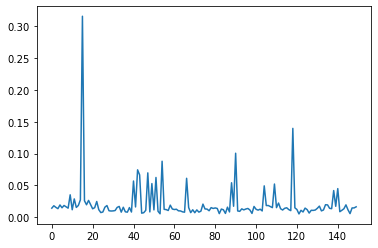

In [64]:
fig,ax=plt.subplots()
ax.plot([i for i in range(len(loss_val_list2))],loss_val_list2)


Change in the learning rate

In [8]:
model_seq2seq_lr2=lstm_seq2seq(1, hidden_dim)

In [9]:
iteration,losses,loss_val_list=model_seq2seq_lr2.train_model(trainloader,valloader,100, output_dim, batch_size=batch_size,
                    training_prediction='recursive', teacher_forcing_ratio=0.5, learning_rate=0.001, dynamic_tf=False,ite_print=2)

  1%|          | 1/100 [00:04<07:37,  4.62s/it, loss=1.257]/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type lstm_seq2seq. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type lstm_encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve

epoch 1 loss train 0.03384886350896624 loss val 0.12227509915828705


  4%|▍         | 4/100 [00:18<07:27,  4.66s/it, loss=0.024]

epoch 3 loss train 0.02413330397879084 loss val 0.07415606081485748


  4%|▍         | 4/100 [00:19<07:54,  4.94s/it, loss=0.024]


KeyboardInterrupt: 

In [10]:
hidden_dim = 256

In [11]:
model_seq2seq_lr3=lstm_seq2seq(1, hidden_dim)

In [12]:
iteration3,losses3,loss_val_list3=model_seq2seq_lr3.train_model(trainloader,valloader,500, output_dim, batch_size=batch_size,
                    training_prediction='teacher_forcing', teacher_forcing_ratio=0.3, learning_rate=0.01, dynamic_tf=True,ite_print=2)

  0%|          | 2/500 [00:15<1:03:34,  7.66s/it, loss=0.028]

epoch 1 loss train 0.027960536018427875 loss val 0.08699557185173035


  1%|          | 4/500 [00:29<1:00:19,  7.30s/it, loss=0.019]

epoch 3 loss train 0.018791050960620243 loss val 0.0746573880314827


  1%|          | 6/500 [00:43<58:53,  7.15s/it, loss=0.019]  

epoch 5 loss train 0.018517837963170476 loss val 0.0722561925649643


  2%|▏         | 8/500 [00:57<58:34,  7.14s/it, loss=0.018]

epoch 7 loss train 0.018346770976980526 loss val 0.07273520529270172


  2%|▏         | 10/500 [01:11<57:48,  7.08s/it, loss=0.018]

epoch 9 loss train 0.017941217300378613 loss val 0.07257818430662155


  2%|▏         | 12/500 [01:25<56:53,  7.00s/it, loss=0.019]

epoch 11 loss train 0.018603216856718063 loss val 0.07812640070915222


  3%|▎         | 14/500 [01:38<56:03,  6.92s/it, loss=0.018]

epoch 13 loss train 0.01837108361845215 loss val 0.07562999427318573


  3%|▎         | 16/500 [01:52<55:32,  6.89s/it, loss=0.019]

epoch 15 loss train 0.01923552357281248 loss val 0.07437751442193985


  4%|▎         | 18/500 [02:06<55:24,  6.90s/it, loss=0.018]

epoch 17 loss train 0.018139162049111392 loss val 0.07149194926023483


  4%|▍         | 20/500 [02:20<55:56,  6.99s/it, loss=0.018]

epoch 19 loss train 0.018056495684302516 loss val 0.07602014392614365


  4%|▍         | 22/500 [02:34<55:34,  6.97s/it, loss=0.019]

epoch 21 loss train 0.018593077910029225 loss val 0.07496295124292374


  5%|▍         | 24/500 [02:47<55:01,  6.94s/it, loss=0.018]

epoch 23 loss train 0.01803361453736822 loss val 0.07341086864471436


  5%|▌         | 26/500 [03:01<54:56,  6.95s/it, loss=0.018]

epoch 25 loss train 0.018100748407757945 loss val 0.07220607995986938


  6%|▌         | 28/500 [03:15<54:45,  6.96s/it, loss=0.019]

epoch 27 loss train 0.018826558565100033 loss val 0.07390785217285156


  6%|▌         | 30/500 [03:29<54:11,  6.92s/it, loss=0.018]

epoch 29 loss train 0.018367363191727135 loss val 0.07548273354768753


  6%|▋         | 32/500 [03:42<53:39,  6.88s/it, loss=0.018]

epoch 31 loss train 0.018083309289067984 loss val 0.0711781457066536


  7%|▋         | 34/500 [03:56<53:30,  6.89s/it, loss=0.018]

epoch 33 loss train 0.018415942477683227 loss val 0.07121023535728455


  7%|▋         | 36/500 [04:10<52:47,  6.83s/it, loss=0.018]

epoch 35 loss train 0.018460327448944252 loss val 0.07386872172355652


  8%|▊         | 38/500 [04:23<52:59,  6.88s/it, loss=0.018]

epoch 37 loss train 0.018022667927046616 loss val 0.07178805023431778


  8%|▊         | 40/500 [04:37<52:52,  6.90s/it, loss=0.018]

epoch 39 loss train 0.01809538036791815 loss val 0.07120870798826218


  8%|▊         | 42/500 [04:51<52:55,  6.93s/it, loss=0.018]

epoch 41 loss train 0.018020209183709487 loss val 0.07124217599630356


  9%|▉         | 44/500 [05:05<52:40,  6.93s/it, loss=0.018]

epoch 43 loss train 0.018167683854699135 loss val 0.07364940643310547


  9%|▉         | 46/500 [05:19<52:16,  6.91s/it, loss=0.018]

epoch 45 loss train 0.01818859877271785 loss val 0.07428723573684692


 10%|▉         | 48/500 [05:32<51:57,  6.90s/it, loss=0.018]

epoch 47 loss train 0.018108341015047498 loss val 0.07272450625896454


 10%|█         | 50/500 [05:46<51:37,  6.88s/it, loss=0.018]

epoch 49 loss train 0.017905870814704232 loss val 0.07219842076301575


 10%|█         | 52/500 [06:00<51:36,  6.91s/it, loss=0.018]

epoch 51 loss train 0.017962635960429907 loss val 0.07294367253780365


 11%|█         | 54/500 [06:14<51:29,  6.93s/it, loss=0.018]

epoch 53 loss train 0.018359901745700173 loss val 0.07308445870876312


 11%|█         | 56/500 [06:30<56:38,  7.65s/it, loss=0.018]

epoch 55 loss train 0.018174681657304365 loss val 0.0712149366736412


 12%|█▏        | 58/500 [06:45<56:04,  7.61s/it, loss=0.018]

epoch 57 loss train 0.018077600850827165 loss val 0.07160210609436035


 12%|█▏        | 60/500 [07:00<55:24,  7.56s/it, loss=0.018]

epoch 59 loss train 0.018126238499664597 loss val 0.07198359072208405


 12%|█▏        | 62/500 [07:15<55:31,  7.61s/it, loss=0.018]

epoch 61 loss train 0.018126726616173983 loss val 0.07316188514232635


 13%|█▎        | 64/500 [07:30<55:06,  7.58s/it, loss=0.018]

epoch 63 loss train 0.018141089162478845 loss val 0.07102220505475998


 13%|█▎        | 66/500 [07:45<54:55,  7.59s/it, loss=0.018]

epoch 65 loss train 0.01809275124429001 loss val 0.07128605991601944


 14%|█▎        | 68/500 [08:01<55:20,  7.69s/it, loss=0.018]

epoch 67 loss train 0.018099654672874346 loss val 0.07229804247617722


 14%|█▍        | 70/500 [08:16<54:17,  7.58s/it, loss=0.018]

epoch 69 loss train 0.01823395723477006 loss val 0.0710359513759613


 14%|█▍        | 72/500 [08:31<53:46,  7.54s/it, loss=0.018]

epoch 71 loss train 0.017985209719174437 loss val 0.07081539928913116


 15%|█▍        | 74/500 [08:45<52:57,  7.46s/it, loss=0.018]

epoch 73 loss train 0.018080927897244692 loss val 0.07204669713973999


 15%|█▌        | 76/500 [09:00<53:16,  7.54s/it, loss=0.018]

epoch 75 loss train 0.018259347985602088 loss val 0.07101376354694366


 16%|█▌        | 78/500 [09:16<53:36,  7.62s/it, loss=0.018]

epoch 77 loss train 0.018028938366721075 loss val 0.0715801864862442


 16%|█▌        | 80/500 [09:30<52:51,  7.55s/it, loss=0.018]

epoch 79 loss train 0.018094177668293316 loss val 0.07081004232168198


 16%|█▋        | 82/500 [09:45<52:42,  7.57s/it, loss=0.018]

epoch 81 loss train 0.01812685974356201 loss val 0.07179053872823715


 17%|█▋        | 84/500 [10:00<52:12,  7.53s/it, loss=0.018]

epoch 83 loss train 0.018036404107179906 loss val 0.0712028220295906


 17%|█▋        | 86/500 [10:15<51:31,  7.47s/it, loss=0.018]

epoch 85 loss train 0.01802424377658301 loss val 0.07171951979398727


 18%|█▊        | 88/500 [10:30<51:05,  7.44s/it, loss=0.018]

epoch 87 loss train 0.017991545868830547 loss val 0.0711522176861763


 18%|█▊        | 90/500 [10:45<50:37,  7.41s/it, loss=0.019]

epoch 89 loss train 0.018664167314353917 loss val 0.07228820025920868


 18%|█▊        | 92/500 [10:59<50:41,  7.46s/it, loss=0.018]

epoch 91 loss train 0.018004618326408997 loss val 0.07209824025630951


 19%|█▉        | 94/500 [11:14<50:24,  7.45s/it, loss=0.018]

epoch 93 loss train 0.018384968758457236 loss val 0.07223892956972122


 19%|█▉        | 96/500 [11:29<50:11,  7.45s/it, loss=0.018]

epoch 95 loss train 0.01801417364428441 loss val 0.07139381766319275


 20%|█▉        | 98/500 [11:44<50:12,  7.49s/it, loss=0.018]

epoch 97 loss train 0.01821317259843151 loss val 0.07233571261167526


 20%|██        | 100/500 [11:59<50:18,  7.55s/it, loss=0.018]

epoch 99 loss train 0.018374670400387712 loss val 0.07231634855270386


 20%|██        | 102/500 [12:15<50:59,  7.69s/it, loss=0.018]

epoch 101 loss train 0.01800934292583002 loss val 0.072982057929039


 21%|██        | 104/500 [12:33<55:37,  8.43s/it, loss=0.018]

epoch 103 loss train 0.018092020880430937 loss val 0.07244995981454849


 21%|██        | 106/500 [12:48<52:40,  8.02s/it, loss=0.018]

epoch 105 loss train 0.01795529092972477 loss val 0.07382336258888245


 22%|██▏       | 108/500 [13:03<50:44,  7.77s/it, loss=0.018]

epoch 107 loss train 0.01837513657907645 loss val 0.0728672593832016


 22%|██▏       | 110/500 [13:18<49:49,  7.67s/it, loss=0.018]

epoch 109 loss train 0.017952985285470884 loss val 0.07137351483106613


 22%|██▏       | 112/500 [13:33<48:53,  7.56s/it, loss=0.018]

epoch 111 loss train 0.018220941225687664 loss val 0.07232564687728882


 23%|██▎       | 114/500 [13:47<48:16,  7.51s/it, loss=0.018]

epoch 113 loss train 0.01802534403072463 loss val 0.07142894715070724


 23%|██▎       | 116/500 [14:02<47:58,  7.50s/it, loss=0.018]

epoch 115 loss train 0.018044327644424304 loss val 0.07265584915876389


 24%|██▎       | 118/500 [14:17<47:56,  7.53s/it, loss=0.018]

epoch 117 loss train 0.018039589799526665 loss val 0.07219152897596359


 24%|██▍       | 120/500 [14:32<47:36,  7.52s/it, loss=0.054]

epoch 119 loss train 0.054414559776584305 loss val 0.13600102066993713


 24%|██▍       | 122/500 [14:47<47:35,  7.55s/it, loss=0.018]

epoch 121 loss train 0.018309363836629525 loss val 0.07532074302434921


 25%|██▍       | 124/500 [15:02<47:30,  7.58s/it, loss=0.018]

epoch 123 loss train 0.01817381035329567 loss val 0.07148820906877518


 25%|██▌       | 126/500 [15:17<47:06,  7.56s/it, loss=0.020]

epoch 125 loss train 0.01975918121428953 loss val 0.07945138216018677


 26%|██▌       | 128/500 [15:34<48:14,  7.78s/it, loss=0.018]

epoch 127 loss train 0.01814180529779858 loss val 0.07640189677476883


 26%|██▌       | 130/500 [15:49<47:29,  7.70s/it, loss=0.018]

epoch 129 loss train 0.018344164463794894 loss val 0.07197016477584839


 26%|██▋       | 132/500 [16:04<47:33,  7.75s/it, loss=0.018]

epoch 131 loss train 0.01814024553944667 loss val 0.07104787975549698


 27%|██▋       | 134/500 [16:19<46:50,  7.68s/it, loss=0.018]

epoch 133 loss train 0.01815390017711454 loss val 0.07118344306945801


 27%|██▋       | 136/500 [16:35<46:41,  7.70s/it, loss=0.018]

epoch 135 loss train 0.01815095129940245 loss val 0.07492226362228394


 28%|██▊       | 138/500 [16:50<45:58,  7.62s/it, loss=0.018]

epoch 137 loss train 0.017976216920134094 loss val 0.0719551146030426


 28%|██▊       | 140/500 [17:05<45:24,  7.57s/it, loss=0.018]

epoch 139 loss train 0.01813731316684021 loss val 0.07190673053264618


 28%|██▊       | 142/500 [17:20<45:23,  7.61s/it, loss=0.018]

epoch 141 loss train 0.018030702136456966 loss val 0.07240239530801773


 29%|██▉       | 144/500 [17:35<44:59,  7.58s/it, loss=0.018]

epoch 143 loss train 0.01814812132053905 loss val 0.07127133756875992


 29%|██▉       | 146/500 [17:50<44:45,  7.59s/it, loss=0.019]

epoch 145 loss train 0.018730074839873448 loss val 0.0715424120426178


 30%|██▉       | 148/500 [18:05<44:17,  7.55s/it, loss=0.018]

epoch 147 loss train 0.018247505856884852 loss val 0.07288409769535065


 30%|███       | 150/500 [18:20<43:48,  7.51s/it, loss=0.018]

epoch 149 loss train 0.017993132376836404 loss val 0.07106618583202362


 30%|███       | 152/500 [18:35<43:32,  7.51s/it, loss=0.018]

epoch 151 loss train 0.018114387419902615 loss val 0.07154843211174011


 31%|███       | 154/500 [18:50<43:38,  7.57s/it, loss=0.018]

epoch 153 loss train 0.01793152621636788 loss val 0.0719749853014946


 31%|███       | 156/500 [19:05<43:14,  7.54s/it, loss=0.018]

epoch 155 loss train 0.01807595691126254 loss val 0.07183977961540222


 32%|███▏      | 158/500 [19:20<42:57,  7.54s/it, loss=0.018]

epoch 157 loss train 0.018256283106489316 loss val 0.07232300937175751


 32%|███▏      | 160/500 [19:35<42:46,  7.55s/it, loss=0.018]

epoch 159 loss train 0.01805411201591293 loss val 0.07141201198101044


 32%|███▏      | 162/500 [19:50<42:54,  7.62s/it, loss=0.018]

epoch 161 loss train 0.018016563831932016 loss val 0.07541152834892273


 33%|███▎      | 164/500 [20:05<42:35,  7.61s/it, loss=0.018]

epoch 163 loss train 0.018090711285670597 loss val 0.07155945152044296


 33%|███▎      | 166/500 [20:20<42:03,  7.56s/it, loss=0.019]

epoch 165 loss train 0.018622949460728302 loss val 0.07297708094120026


 34%|███▎      | 168/500 [20:35<41:36,  7.52s/it, loss=0.018]

epoch 167 loss train 0.0182121936749253 loss val 0.07211510837078094


 34%|███▍      | 170/500 [20:50<41:26,  7.54s/it, loss=0.018]

epoch 169 loss train 0.01821147572870056 loss val 0.07106679677963257


 34%|███▍      | 172/500 [21:05<41:21,  7.56s/it, loss=0.018]

epoch 171 loss train 0.01793557633128431 loss val 0.07417448610067368


 35%|███▍      | 174/500 [21:20<40:56,  7.54s/it, loss=0.018]

epoch 173 loss train 0.01827226310140557 loss val 0.07205457985401154


 35%|███▌      | 176/500 [21:35<40:39,  7.53s/it, loss=0.018]

epoch 175 loss train 0.018232302274554968 loss val 0.07154680788516998


 36%|███▌      | 178/500 [21:50<40:27,  7.54s/it, loss=0.018]

epoch 177 loss train 0.018213439267128706 loss val 0.07140766084194183


 36%|███▌      | 180/500 [22:05<40:32,  7.60s/it, loss=0.018]

epoch 179 loss train 0.01817481964826584 loss val 0.0728868693113327


 36%|███▋      | 182/500 [22:20<40:33,  7.65s/it, loss=0.018]

epoch 181 loss train 0.01809175146950616 loss val 0.07262670993804932


 37%|███▋      | 184/500 [22:35<40:01,  7.60s/it, loss=0.018]

epoch 183 loss train 0.01810165634378791 loss val 0.07325655966997147


 37%|███▋      | 186/500 [22:50<39:41,  7.58s/it, loss=0.018]

epoch 185 loss train 0.018211673376046948 loss val 0.07093285024166107


 38%|███▊      | 188/500 [23:06<40:00,  7.69s/it, loss=0.018]

epoch 187 loss train 0.017965616296148963 loss val 0.07241346687078476


 38%|███▊      | 190/500 [23:21<39:35,  7.66s/it, loss=0.018]

epoch 189 loss train 0.01817207385061516 loss val 0.07480409741401672


 38%|███▊      | 192/500 [23:36<39:08,  7.62s/it, loss=0.018]

epoch 191 loss train 0.01800062083121803 loss val 0.07108695805072784


 39%|███▉      | 194/500 [23:51<38:48,  7.61s/it, loss=0.018]

epoch 193 loss train 0.018148906270249024 loss val 0.07144483923912048


 39%|███▉      | 196/500 [24:06<38:37,  7.62s/it, loss=0.018]

epoch 195 loss train 0.018056636158790853 loss val 0.07358893007040024


 40%|███▉      | 198/500 [24:22<38:22,  7.62s/it, loss=0.018]

epoch 197 loss train 0.018055255835254986 loss val 0.07114813476800919


 40%|████      | 200/500 [24:37<37:58,  7.60s/it, loss=0.018]

epoch 199 loss train 0.0182721896821426 loss val 0.07284650206565857


 40%|████      | 202/500 [24:52<37:52,  7.63s/it, loss=0.018]

epoch 201 loss train 0.018004539526171155 loss val 0.07327520847320557


 41%|████      | 204/500 [25:07<37:43,  7.65s/it, loss=0.018]

epoch 203 loss train 0.01800679938039846 loss val 0.07099780440330505


 41%|████      | 206/500 [25:22<37:39,  7.69s/it, loss=0.018]

epoch 205 loss train 0.018278633503036365 loss val 0.07115626335144043


 42%|████▏     | 208/500 [25:38<37:10,  7.64s/it, loss=0.018]

epoch 207 loss train 0.018035391293880012 loss val 0.07157166302204132


 42%|████▏     | 210/500 [25:53<36:54,  7.64s/it, loss=0.018]

epoch 209 loss train 0.017924817382461496 loss val 0.07156750559806824


 42%|████▏     | 212/500 [26:08<36:48,  7.67s/it, loss=0.018]

epoch 211 loss train 0.018273143822120294 loss val 0.07429181784391403


 43%|████▎     | 214/500 [26:23<36:32,  7.67s/it, loss=0.018]

epoch 213 loss train 0.018081526685920026 loss val 0.07171814143657684


 43%|████▎     | 216/500 [26:39<36:50,  7.78s/it, loss=0.018]

epoch 215 loss train 0.018026590968171757 loss val 0.07111362367868423


 44%|████▎     | 218/500 [26:55<37:12,  7.91s/it, loss=0.018]

epoch 217 loss train 0.018116617678768106 loss val 0.07109586894512177


 44%|████▍     | 220/500 [27:11<37:19,  8.00s/it, loss=0.018]

epoch 219 loss train 0.017954194711314306 loss val 0.07140511274337769


 44%|████▍     | 222/500 [27:27<36:48,  7.94s/it, loss=0.018]

epoch 221 loss train 0.017883152649220493 loss val 0.0709444135427475


 45%|████▍     | 224/500 [27:42<35:53,  7.80s/it, loss=0.018]

epoch 223 loss train 0.01794374232283897 loss val 0.07182449102401733


 45%|████▌     | 226/500 [27:58<35:45,  7.83s/it, loss=0.018]

epoch 225 loss train 0.018169064178235002 loss val 0.07152742892503738


 46%|████▌     | 228/500 [28:14<36:00,  7.94s/it, loss=0.018]

epoch 227 loss train 0.01807623987810479 loss val 0.07286277413368225


 46%|████▌     | 230/500 [28:30<35:57,  7.99s/it, loss=0.018]

epoch 229 loss train 0.018224274325701926 loss val 0.07201021164655685


 46%|████▋     | 232/500 [28:45<35:07,  7.86s/it, loss=0.018]

epoch 231 loss train 0.01828884907687704 loss val 0.07216226309537888


 47%|████▋     | 234/500 [29:00<34:30,  7.79s/it, loss=0.018]

epoch 233 loss train 0.017940803793155484 loss val 0.07250967621803284


 47%|████▋     | 236/500 [29:16<34:42,  7.89s/it, loss=0.018]

epoch 235 loss train 0.018076646866069898 loss val 0.0713563859462738


 48%|████▊     | 238/500 [29:32<34:53,  7.99s/it, loss=0.018]

epoch 237 loss train 0.018044081050902605 loss val 0.0725451335310936


 48%|████▊     | 240/500 [29:48<34:41,  8.00s/it, loss=0.018]

epoch 239 loss train 0.017948289815750387 loss val 0.07307024300098419


 48%|████▊     | 242/500 [30:04<34:15,  7.97s/it, loss=0.018]

epoch 241 loss train 0.017827920770893495 loss val 0.0714959055185318


 49%|████▉     | 244/500 [30:19<33:17,  7.80s/it, loss=0.018]

epoch 243 loss train 0.017931014351132844 loss val 0.07383529841899872


 49%|████▉     | 246/500 [30:35<33:28,  7.91s/it, loss=0.018]

epoch 245 loss train 0.017930127783781953 loss val 0.07195822894573212


 50%|████▉     | 248/500 [30:51<33:29,  7.97s/it, loss=0.018]

epoch 247 loss train 0.017941405789719686 loss val 0.07155641913414001


 50%|█████     | 250/500 [31:09<35:32,  8.53s/it, loss=0.018]

epoch 249 loss train 0.018112149089574814 loss val 0.07127584517002106


 50%|█████     | 252/500 [31:25<33:26,  8.09s/it, loss=0.018]

epoch 251 loss train 0.01814285707142618 loss val 0.07167112827301025


 51%|█████     | 254/500 [31:39<31:05,  7.58s/it, loss=0.018]

epoch 253 loss train 0.018377244006842375 loss val 0.0726955235004425


 51%|█████     | 256/500 [31:53<29:46,  7.32s/it, loss=0.018]

epoch 255 loss train 0.018340244216637477 loss val 0.07824693620204926


 52%|█████▏    | 258/500 [32:07<29:17,  7.26s/it, loss=0.018]

epoch 257 loss train 0.018380489769495197 loss val 0.07274994254112244


 52%|█████▏    | 260/500 [32:22<29:03,  7.26s/it, loss=0.018]

epoch 259 loss train 0.017929178041716416 loss val 0.0715097188949585


 52%|█████▏    | 262/500 [32:36<28:15,  7.12s/it, loss=0.018]

epoch 261 loss train 0.017789799254387617 loss val 0.07042678445577621


 53%|█████▎    | 264/500 [32:49<27:43,  7.05s/it, loss=0.018]

epoch 263 loss train 0.01802148235340913 loss val 0.0730154886841774


 53%|█████▎    | 266/500 [33:03<27:26,  7.04s/it, loss=0.018]

epoch 265 loss train 0.01805109240942531 loss val 0.07211735844612122


 54%|█████▎    | 268/500 [33:19<28:32,  7.38s/it, loss=0.018]

epoch 267 loss train 0.0182324201386008 loss val 0.07203936576843262


 54%|█████▍    | 270/500 [33:33<28:29,  7.43s/it, loss=0.018]

epoch 269 loss train 0.018025497905910015 loss val 0.07261688262224197


 54%|█████▍    | 272/500 [2:33:46<96:12:09, 1518.99s/it, loss=0.018] 

epoch 271 loss train 0.0179516463023093 loss val 0.07047426700592041


 55%|█████▍    | 274/500 [4:34:03<141:54:01, 2260.36s/it, loss=0.018]

epoch 273 loss train 0.01814880667047368 loss val 0.07024359703063965


 55%|█████▌    | 276/500 [5:22:57<107:19:26, 1724.85s/it, loss=0.018]

epoch 275 loss train 0.018018413490305345 loss val 0.07098887860774994


 56%|█████▌    | 278/500 [6:57:06<132:01:39, 2140.99s/it, loss=0.018]

epoch 277 loss train 0.018148404287381306 loss val 0.07336612045764923


 56%|█████▌    | 280/500 [6:57:20<64:20:07, 1052.76s/it, loss=0.018] 

epoch 279 loss train 0.018048543327798445 loss val 0.07071418315172195


 56%|█████▋    | 282/500 [6:57:35<31:27:32, 519.50s/it, loss=0.018] 

epoch 281 loss train 0.017860932068692312 loss val 0.07147059589624405


 57%|█████▋    | 283/500 [6:57:47<5:20:21, 88.58s/it, loss=0.323]  


KeyboardInterrupt: 

In [43]:
def plot_predict(dic_model,valloader,seq_len,lcolor=None):
    if lcolor is None:
        lcolor=["blue","red","green","orange","purple"]
    for seq,label in valloader:
        fig, ax = plt.subplots()
        for i,name_model in enumerate(dic_model): #dic torch_name, torchmodel
            model=dic_model[name_model]
            if name_model=="lstm":
                model.eval()
                xpred=model(seq).detach().numpy()
            else:
                pred=model.predict(seq,seq_len)
                print(pred.shape)
                print(label.shape)
                xpred=pred.squeeze(1).squeeze(1).detach().numpy()
                print(xpred.shape)
            ax.plot([i for i in range(seq_len)],xpred,lcolor[i], label="pred_{}".format(name_model))
        xlab = label.squeeze(0).detach().numpy()
        ax.plot([i for i in range(seq_len)],xlab,"black",label="label")
        ax.legend()
        plt.show()

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


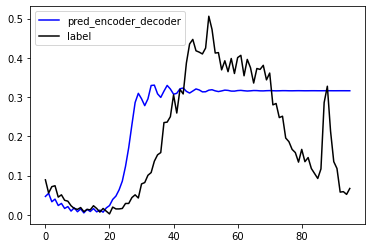

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


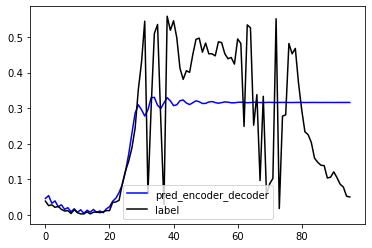

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


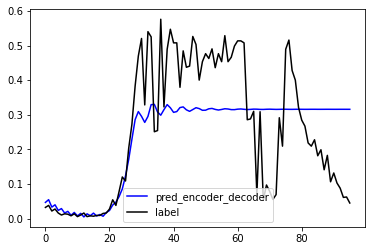

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


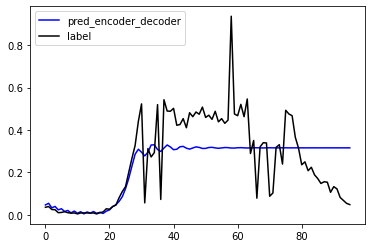

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


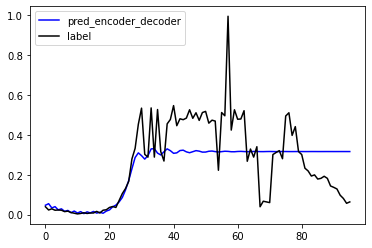

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


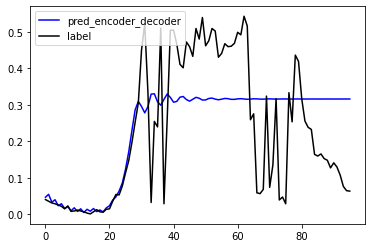

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


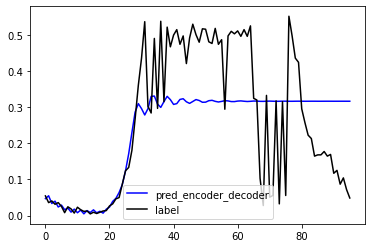

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


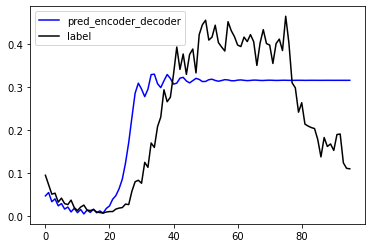

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


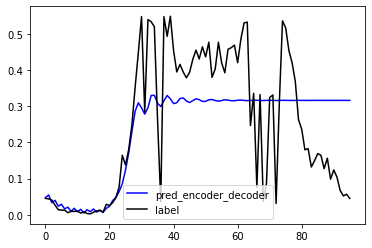

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


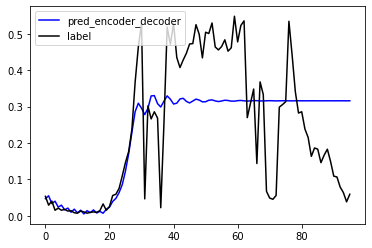

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


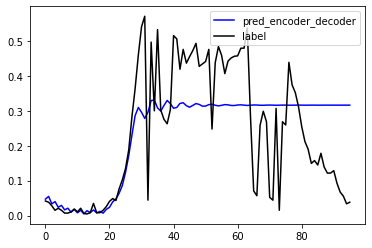

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


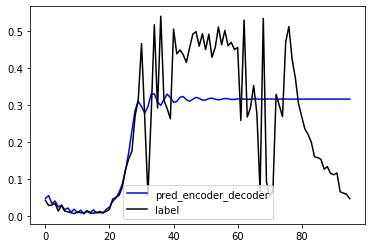

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


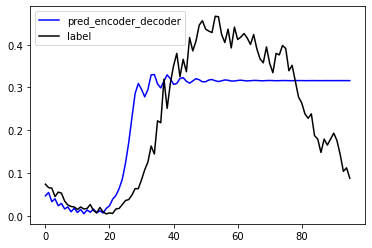

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


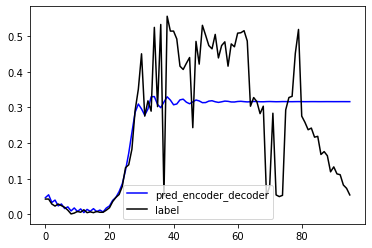

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


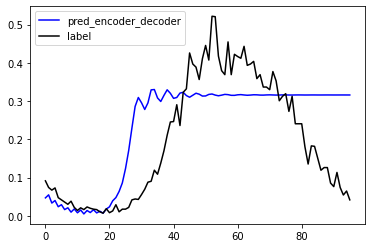

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


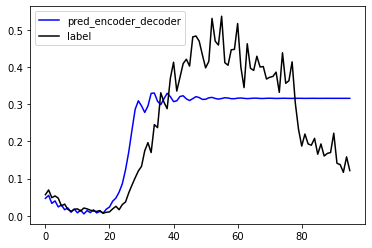

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


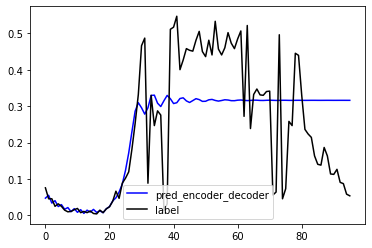

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


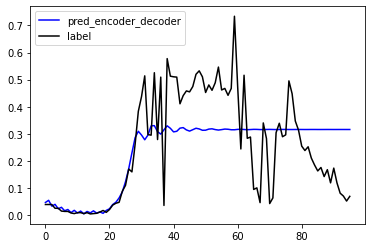

In [16]:
plot_predict({"encoder_decoder":model_seq2seq_lr3},trainloader,96)

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


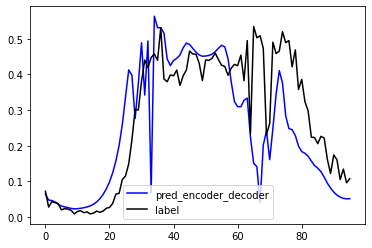

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


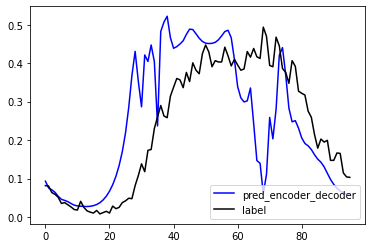

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


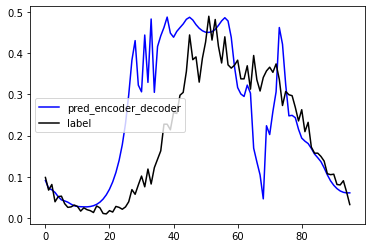

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


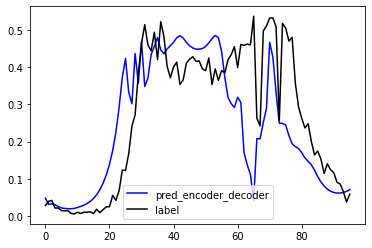

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


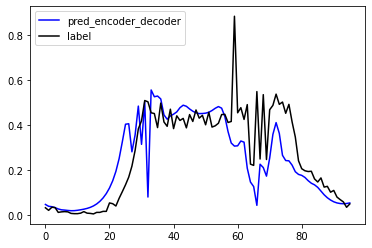

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


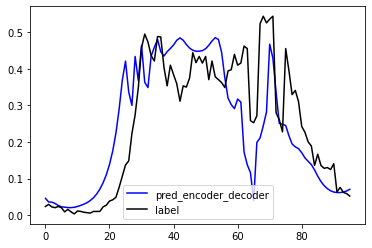

torch.Size([96, 1, 1])
torch.Size([1, 96])
(96,)


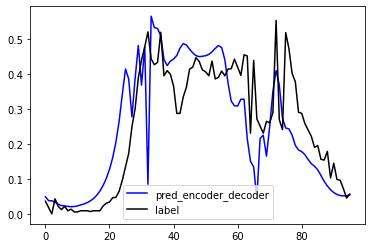

In [67]:
plot_predict({"encoder_decoder":model_seq2seq},testloader,96)

In [17]:
input_dim = INPUT_SIZE   
hidden_dim = 256
layer_dim = 2
output_dim = OUTPUT_SIZE
seq_dim = 1

lr = 0.05
n_epochs = 300
iterations_per_epoch = len(trainloader)
name_model = "simple_model_smalldataset_lr5e-2"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
model=LSTM(input_size=input_dim,hidden_size=hidden_dim,output_size=output_dim)


In [53]:
iteration_sm,loss_train_list_sm,loss_val_list_sm=train(model, trainloader, valloader, lr=lr, n_epochs=n_epochs, name_model=name_model, device=device, ite_print=5,save=True)

/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1, 96])) that is different to the input size (torch.Size([96])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 1 loss train 0.008406988345086575 loss val 0.00733605632558465


/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/iris/opt/anaconda3/envs/dl_env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


epoch 6 loss train 0.003726701717823744 loss val 0.0063735670410096645
epoch 11 loss train 0.0045509724877774715 loss val 0.006397200282663107
epoch 16 loss train 0.004224316217005253 loss val 0.006593207363039255
epoch 21 loss train 0.009880243800580502 loss val 0.007390396669507027
epoch 26 loss train 0.009210361167788506 loss val 0.007585143204778433
epoch 31 loss train 0.016036540269851685 loss val 0.013288366608321667
epoch 36 loss train 0.005148252472281456 loss val 0.010537125170230865
epoch 41 loss train 0.012951220385730267 loss val 0.013328886590898037
epoch 46 loss train 0.006074537057429552 loss val 0.01793675869703293
epoch 51 loss train 0.013069498352706432 loss val 0.008316755294799805
epoch 56 loss train 0.011490204371511936 loss val 0.012149211950600147
epoch 61 loss train 0.004649559035897255 loss val 0.009737054817378521
epoch 66 loss train 0.008686024695634842 loss val 0.010134434327483177
epoch 71 loss train 0.008943570777773857 loss val 0.013642181642353535
epoch 